In [54]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [8]:
hist.Freq(2)

2

In [7]:
hist[2]

2

In [9]:
hist.Freq(4)

0

In [10]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [12]:
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


In [13]:
for val, freq in hist.Items():
    print(val, freq)

1 1
2 2
3 1
5 1


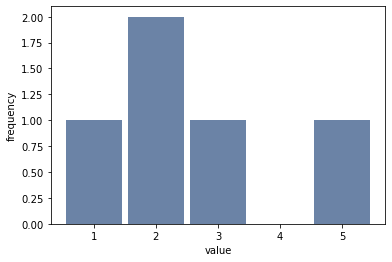

<Figure size 576x432 with 0 Axes>

In [14]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

In [16]:
import nsfg

In [17]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

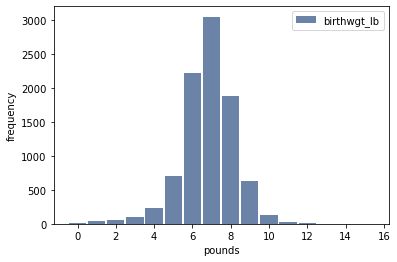

<Figure size 576x432 with 0 Axes>

In [18]:
hist = thinkstats2.Hist(live.birthwgt_lb, label = 'birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

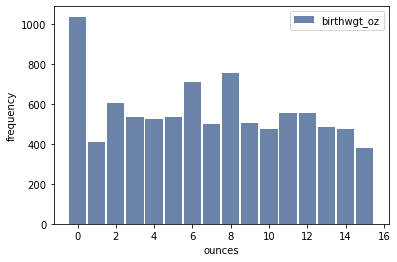

<Figure size 576x432 with 0 Axes>

In [19]:
hist2 = thinkstats2.Hist(live.birthwgt_oz, label = 'birthwgt_oz')
thinkplot.Hist(hist2)
thinkplot.Show(xlabel='ounces', ylabel='frequency')

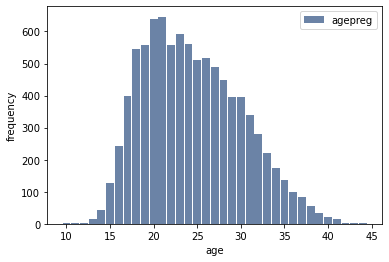

<Figure size 576x432 with 0 Axes>

In [25]:
import numpy as np
ages = np.floor(live.agepreg)
hist3 = thinkstats2.Hist(ages, label = 'agepreg')
thinkplot.Hist(hist3)
thinkplot.Show(xlabel='age', ylabel='frequency')

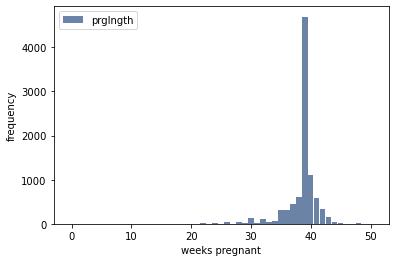

<Figure size 576x432 with 0 Axes>

In [22]:
hist4 = thinkstats2.Hist(live.prglngth, label = 'prglngth')
thinkplot.Hist(hist4)
thinkplot.Show(xlabel='weeks pregnant', ylabel='frequency')

In [28]:
for weeks, freq in hist4.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [30]:
for weeks, freq in hist4.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


In [31]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

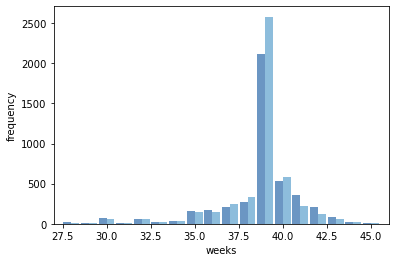

<Figure size 576x432 with 0 Axes>

In [33]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width = width)
thinkplot.Hist(other_hist, align='left', width = width)
thinkplot.Show(xlabel='weeks', ylabel='frequency', xlim=[27, 46])

In [35]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

2.702343810070593

In [39]:
mean, std, var

(38.56055968517709, 2.702343810070593, 7.302662067826851)

In [61]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [62]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

In [63]:
(firsts.prglngth.mean() - others.prglngth.mean()) * 168

13.11026081862832

In [58]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [60]:
CohenEffectSize(firsts['prglngth'], others['prglngth'])

0.028879044654449883

#### Exercise 2-1

To summarize pregnancy length of firstborns compared to other newborns based on what I've learned in this chapter, I would say that the data shows very little overall difference in arrival times between firstborns and other newborns. Given the wide variance in pregnancy length, with a standard deviation of over two weeks, a 13 hour difference seems pretty small, and shows, if anything, that first babies actually arrive earlier, not later. 

If I wanted to blow things out of proportion to make the news, I would probably first get a p-value to see if the results are significant. If they were, my headline would be something like: "Has your family been lying to you? New study reveals that firstborns arrive significantly earlier than later pregnancies!"

If I was trying to reassure an anxious patient, I would point out the wide spread in pregnancy lengths (which skew toward being shorter than the typical length if she doesn't like being pregnant) to show that there are a wide variety of normal pregnancies that produce healthy babies. 

"Do first babies arrive late?"

It is often said that a mother's first pregnancy lasts longer than her later pregnancies. Let's take a look at the data to see if this old wives tale is true, or if the first pregnancy just feels longer. Using CDC data from a recent National Survey of amily Growth, we've learned that the average length of a first pregnancy is 38.60 weeks, compared to 38.52 weeks for all other pregnancies combined. If you're thinking this looks like a small difference, you'd be right, because this amounts to just a little over 13 hours and not just that, but the first pregnancies are, on average, actually shorter not longer. Looking at all the data together, we get a standard deviation of 2.70 weeks, making a difference of just 0.08 weeks seem pretty insignificant overall. So considering the many things a new mother has to concern herself with, whether her this newborn will arrive earlier or later than any of her following pregnancies isn't one of them.

